In [66]:
import emoji
import pandas as pd 
import numpy as np
from glove_vec import read_glove_vectors
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv("./train_emoji.csv", header=None)

In [33]:
data.head(5)

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [34]:
emoji_dict = {
    "0" : ":beating_heart:",
    "1" : ":baseball:",
    "2" : ":smile:",
    "3" : ":disappointed:",
    "4" : ":fork_and_knife:"
}

In [35]:
for ix in emoji_dict.keys():
    print emoji.emojize(emoji_dict[ix],use_aliases=True)

⚾
💓
😞
😄
🍴


In [36]:
X_train = data[0].values
y_train = data[1].values

In [38]:
for ix in range(X_train.shape[0]):
    X_train[ix] = X_train[ix].lower().split()

In [39]:
X_train[0]

['never', 'talk', 'to', 'me', 'again']

In [40]:
print (emoji.emojize(emoji_dict[str(y_train[0])],use_aliases=True))

😞


In [41]:
word_emb_matrix = read_glove_vectors("../glove.6B.50d.txt")

In [42]:
X = np.zeros((X_train.shape[0],50))

In [44]:
def avg_vec(sen):
    
    sum_vec = word_emb_matrix[sen[0]]
    
    for ix in range(1,len(sen)):
        sum_vec += word_emb_matrix[sen[ix]]
    avg = sum_vec/float(len(sen))

    return avg

In [45]:
for ix in range(X.shape[0]):
    X[ix] = avg_vec(X_train[ix])

In [47]:
y = np_utils.to_categorical(y_train)

In [48]:
print (X.shape,y.shape)

((132, 50), (132, 5))


In [81]:
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(50,)))
model.add(Dense(5,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 85        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [82]:
adam = Adam(decay=0.002)

In [83]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [84]:
hist = model.fit(X,y,epochs=100,shuffle=True,batch_size=32)

Epoch 1/100
132/132 [==============================] - 0s 3ms/step - loss: 6.7980 - acc: 0.1288
Epoch 2/100
132/132 [==============================] - 0s 465us/step - loss: 6.2964 - acc: 0.1288
Epoch 3/100
132/132 [==============================] - 0s 353us/step - loss: 5.7612 - acc: 0.1667
Epoch 4/100
132/132 [==============================] - 0s 413us/step - loss: 5.0447 - acc: 0.2197
Epoch 5/100
132/132 [==============================] - 0s 403us/step - loss: 4.6358 - acc: 0.2500
Epoch 6/100
132/132 [==============================] - 0s 419us/step - loss: 4.0498 - acc: 0.2197
Epoch 7/100
132/132 [==============================] - 0s 373us/step - loss: 3.6926 - acc: 0.2121
Epoch 8/100
132/132 [==============================] - 0s 403us/step - loss: 3.1989 - acc: 0.1970
Epoch 9/100
132/132 [==============================] - 0s 441us/step - loss: 3.3464 - acc: 0.2803
Epoch 10/100
132/132 [==============================] - 0s 500us/step - loss: 3.0672 - acc: 0.2727
Epoch 11/100
132/132 

132/132 [==============================] - 0s 288us/step - loss: 1.5439 - acc: 0.4167
Epoch 84/100
132/132 [==============================] - 0s 401us/step - loss: 1.6664 - acc: 0.4167
Epoch 85/100
132/132 [==============================] - 0s 330us/step - loss: 1.4794 - acc: 0.4545
Epoch 86/100
132/132 [==============================] - 0s 531us/step - loss: 1.4597 - acc: 0.4470
Epoch 87/100
132/132 [==============================] - 0s 564us/step - loss: 1.4255 - acc: 0.4318
Epoch 88/100
132/132 [==============================] - 0s 461us/step - loss: 1.3776 - acc: 0.4545
Epoch 89/100
132/132 [==============================] - 0s 419us/step - loss: 1.3946 - acc: 0.4394
Epoch 90/100
132/132 [==============================] - 0s 295us/step - loss: 1.3915 - acc: 0.4242
Epoch 91/100
132/132 [==============================] - 0s 523us/step - loss: 1.4341 - acc: 0.4242
Epoch 92/100
132/132 [==============================] - 0s 348us/step - loss: 1.4728 - acc: 0.4394
Epoch 93/100
132/132 [=

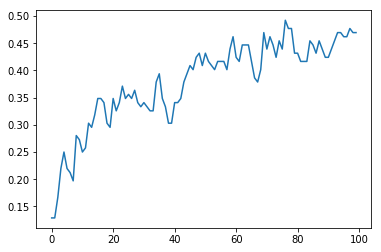

In [85]:
plt.figure()
plt.plot(hist.history['acc'])
plt.show()

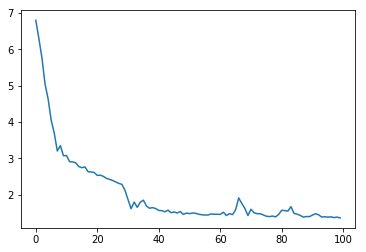

In [86]:
plt.plot(hist.history['loss'])

In [91]:
test = "i love this movie"

test = test.split()
test = avg_vec(test).reshape(1,-1)
print test.shape

(1, 50)


In [93]:
y_pred = model.predict_classes(test)

In [96]:
print ("i love this movie")
print (emoji.emojize(emoji_dict[str(y_pred[0])],use_aliases=True))

i love this movie
😄
